# Project: Fashion MNIST classification using SVM


- Team members:

    21127122 - Hồ Thanh Nhân
    
    21127740 - Đoàn Nam Thắng

---

### 1. Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd
import time

import os
import sys

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the 'utils' directory
utils_path = os.path.join(current_dir, 'utils')
sys.path.append(utils_path)
import mnist_reader

### 2. Load the data

In [2]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

X_train_clone = X_train
y_train_clone = y_train

print("X_train shape:", X_train.shape);
print("y_train shape:", y_train.shape);
print("X_test shape:", X_test.shape);
print("y_test shape:", y_test.shape);

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


### 3. Split raw data and show Scree plot of the raw data

##### Split the data into training and validation sets

In [3]:
train_X, val_X, train_y, val_y = train_test_split(X_train_clone, y_train_clone, test_size=10000, random_state=42)

print("train_X shape:", train_X.shape);
print("train_y shape:", train_y.shape);
print("val_X shape:", val_X.shape);
print("val_y shape:", val_y.shape);

train_X shape: (50000, 784)
train_y shape: (50000,)
val_X shape: (10000, 784)
val_y shape: (10000,)


Show Scree plot of the raw data

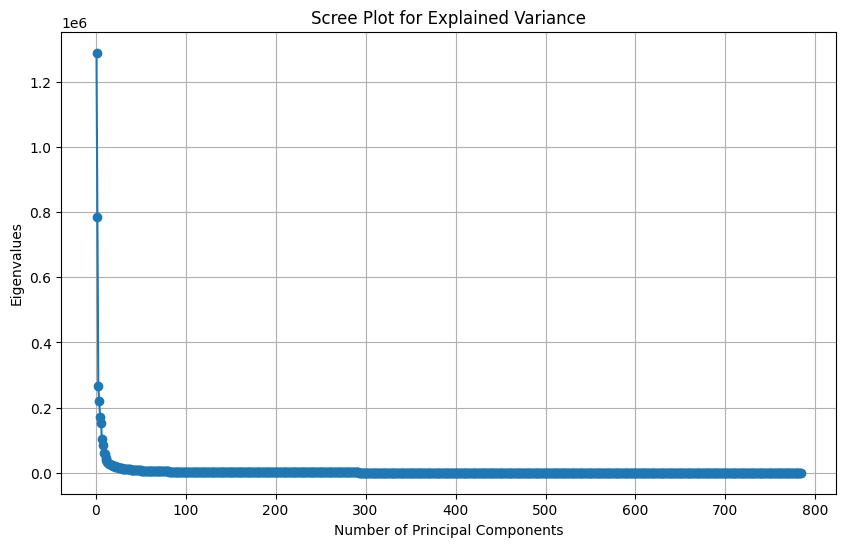

In [4]:
pca = PCA(random_state=42)
train_X_pca = pca.fit_transform(train_X)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_, marker='o')
plt.title('Scree Plot for Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)

plt.show()

### 4. Standardize the data using MinMaxScaler

In [10]:
# Can use StandardScaler or MinMaxScaler to scale the data
scaler = MinMaxScaler()
train_X_std = scaler.fit_transform(train_X)
val_X_std = scaler.transform(val_X)

### 5. Use PCA to reduce the dimensionality of the data

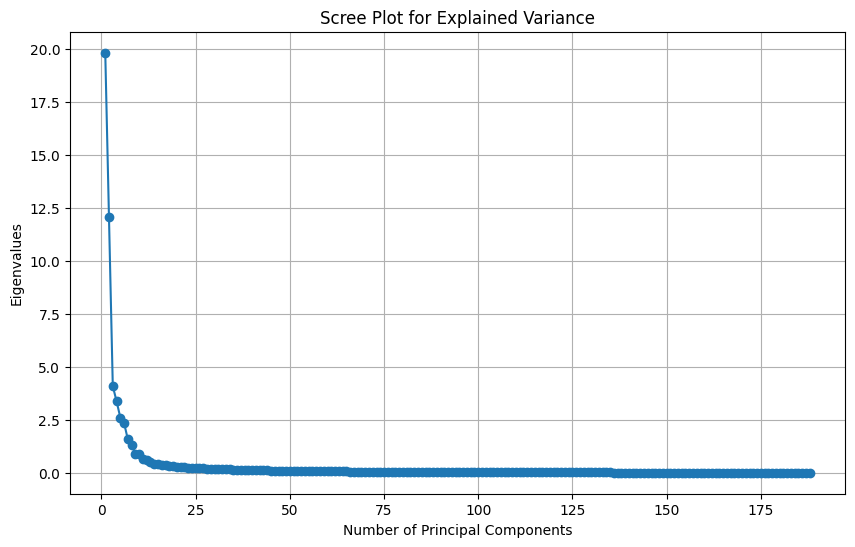

train_X_pca shape: (50000, 188)
val_X_pca shape: (10000, 188)


In [9]:
pca = PCA(n_components= 0.95, random_state=42)
train_X_pca = pca.fit_transform(train_X_std)
val_X_pca = pca.transform(val_X_std) 


train_X_df = pd.DataFrame(train_X_pca)
val_X_df = pd.DataFrame(val_X_pca)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_, marker='o')
plt.title('Scree Plot for Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()
print("train_X_pca shape:", train_X_pca.shape);
print("val_X_pca shape:", val_X_pca.shape);

### 6. Define the parameter values of the best model

In [11]:
best_accuracy = 0
best_C = None
best_gamma = None
best_kernel = None

### 7. Linear kernel


##### Train linear kernel

C=0.01, Train Accuracy: 0.86618, Validation accuracy: 0.8582
Linear SVM Training Time: 294.7989180088043 seconds
__________________________________________________________________________
C=0.1, Train Accuracy: 0.87702, Validation accuracy: 0.8617
Linear SVM Training Time: 254.8490264415741 seconds
__________________________________________________________________________
C=1, Train Accuracy: 0.88182, Validation accuracy: 0.858
Linear SVM Training Time: 278.9597473144531 seconds
__________________________________________________________________________
C=10, Train Accuracy: 0.8835, Validation accuracy: 0.854
Linear SVM Training Time: 473.7041177749634 seconds
__________________________________________________________________________
C=50, Train Accuracy: 0.88404, Validation accuracy: 0.8535
Linear SVM Training Time: 1215.460047006607 seconds
__________________________________________________________________________


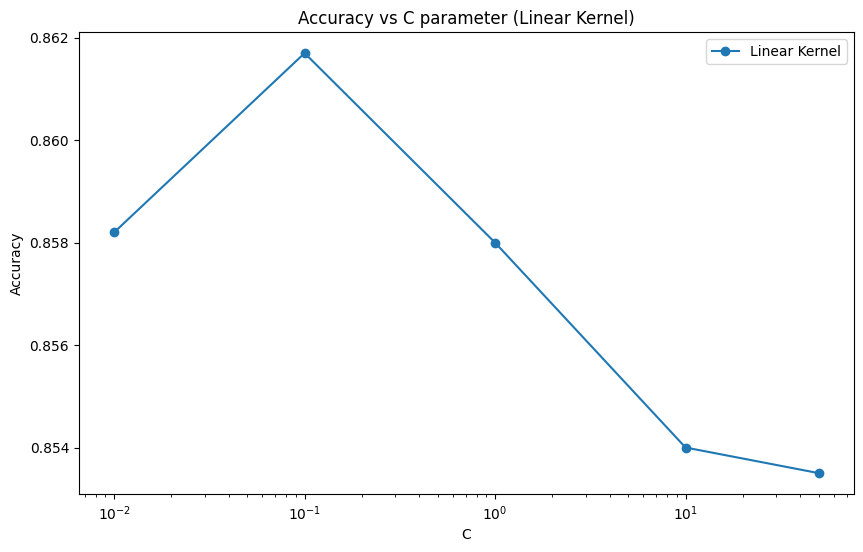

In [41]:
# Try different values of C
C_values = [0.01, 0.1, 1, 10, 50]

accuracy_values_linear = []

for C in C_values:
    start_time = time.time()
    # Train the SVM
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(train_X_df, train_y)

    # Predictions on the train set and the validation set
    train_y_pred = svm_linear.predict(train_X_df)
    val_y_pred = svm_linear.predict(val_X_df)

    # Evaluate accuracy on the train set and the validation set
    train_accuracy = accuracy_score(train_y, train_y_pred)
    val_accuracy = accuracy_score(val_y, val_y_pred)

    # Check if this combination is better
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_C = C
        best_kernel = 'linear'

    accuracy_values_linear.append(val_accuracy)

    print(f"C={C}, Train Accuracy: {train_accuracy}, Validation accuracy: {val_accuracy}")
    end_time = time.time()
    print(f"Linear SVM Training Time: {end_time - start_time} seconds")
    print('__________________________________________________________________________')

# Plot the results for linear kernel
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs C parameter (Linear Kernel)")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(C_values, accuracy_values_linear, 'o-', label='Linear Kernel')
plt.xscale('log')
plt.legend()
plt.show()

##### Plot training time 

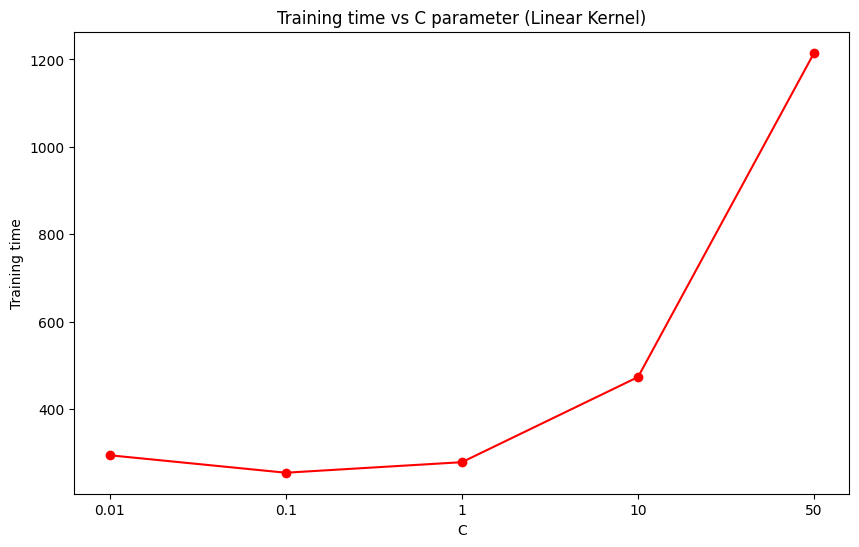

In [29]:
values_of_c = [0.01, 0.1, 1, 10, 50]
training_times = [294.79, 254.84, 278.95, 473.70, 1215.46]

plt.figure(figsize=(10, 6))

index = range(len(values_of_c))

plt.plot(index, training_times, marker='o', linestyle='-', color='red')

plt.xticks(index, values_of_c)

plt.xlabel('C')
plt.ylabel('Training time')

plt.title('Training time vs C parameter (Linear Kernel)')

plt.show()

### 8. Gaussian/RBF Kernel

##### Try different values of C and gamma

auto gamma: 0.005319148936170213
scale gamma: 0.015423852744921753


C=0.01, gamma=0.0001, Train Accuracy: 0.28062, Validation accuracy: 0.2769
RBF SVM Training Time: 1839.6403307914734 seconds
__________________________________________________________________________
C=0.01, gamma=0.001, Train Accuracy: 0.70784, Validation accuracy: 0.7086
RBF SVM Training Time: 1167.3085725307465 seconds
__________________________________________________________________________
C=0.01, gamma=0.01, Train Accuracy: 0.78154, Validation accuracy: 0.7784
RBF SVM Training Time: 718.3752973079681 seconds
__________________________________________________________________________
C=0.01, gamma=0.1, Train Accuracy: 0.57894, Validation accuracy: 0.5774
RBF SVM Training Time: 3716.1717557907104 seconds
__________________________________________________________________________
C=0.01, gamma=1, Train Accuracy: 0.10106, Validation accuracy: 0.0947
RBF SVM Training Time: 1758.548479795456 seconds
___________________

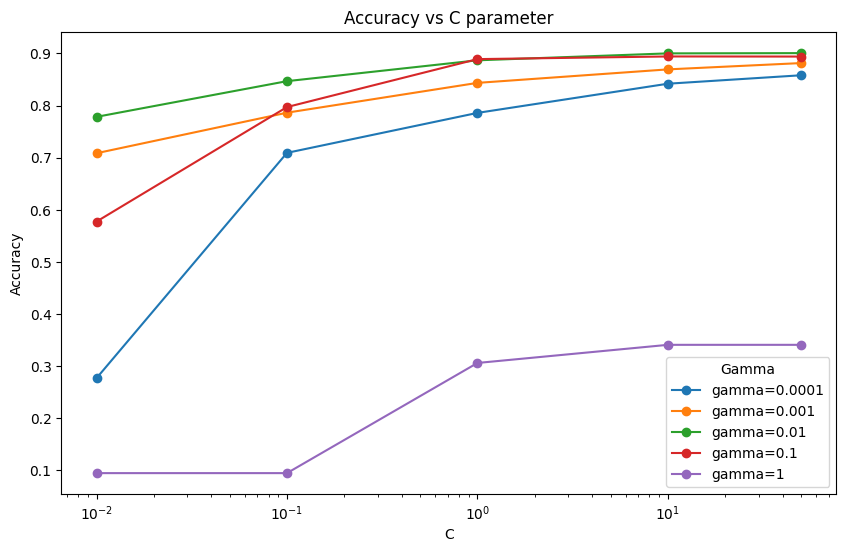

In [7]:
# Try different values of C and gamma
C_values = [0.01, 0.1, 1, 10, 50] 


number_of_features =  train_X_df.shape[1] 
features_variance = train_X_df.values.var()
print('auto gamma:', 1/(number_of_features))
print('scale gamma:', 1/(number_of_features * features_variance))
print('\n')

gamma_values = [0.0001, 0.001, 0.01, 0.1, 1] 
accuracy_values_rbf = []


for C in C_values:

    accuracy_for_C = []
    for gamma in gamma_values:
        # Train the SVM
        start_time = time.time()

        svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
        svm_rbf.fit(train_X_df, train_y)


        # Predictions on the train set and validation set
        train_y_pred = svm_rbf.predict(train_X_df)
        val_y_pred = svm_rbf.predict(val_X_df)

        # Evaluate accuracy on the validation set
        train_accuracy = accuracy_score(train_y, train_y_pred)
        val_accuracy = accuracy_score(val_y, val_y_pred)

        accuracy_for_C.append(val_accuracy)

        # Check if this combination is better
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_C = C
            best_gamma = gamma
            best_kernel = 'rbf'

        print(f"C={C}, gamma={gamma}, Train Accuracy: {train_accuracy}, Validation accuracy: {val_accuracy}")
        
        end_time = time.time()
        print(f"RBF SVM Training Time: {end_time - start_time} seconds")
        print('__________________________________________________________________________')
    
    accuracy_values_rbf.append(accuracy_for_C)
    
accuracy_values_rbf = np.array(accuracy_values_rbf)
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs C parameter")
plt.xlabel("C")
plt.ylabel("Accuracy")

# Plot each line for different gamma values
for i, gamma in enumerate(gamma_values):
    plt.plot(C_values, accuracy_values_rbf[:, i], 'o-', label='gamma=' + str(gamma))

plt.legend(title='Gamma')
plt.xscale('log')
plt.show()

##### Plot training time 

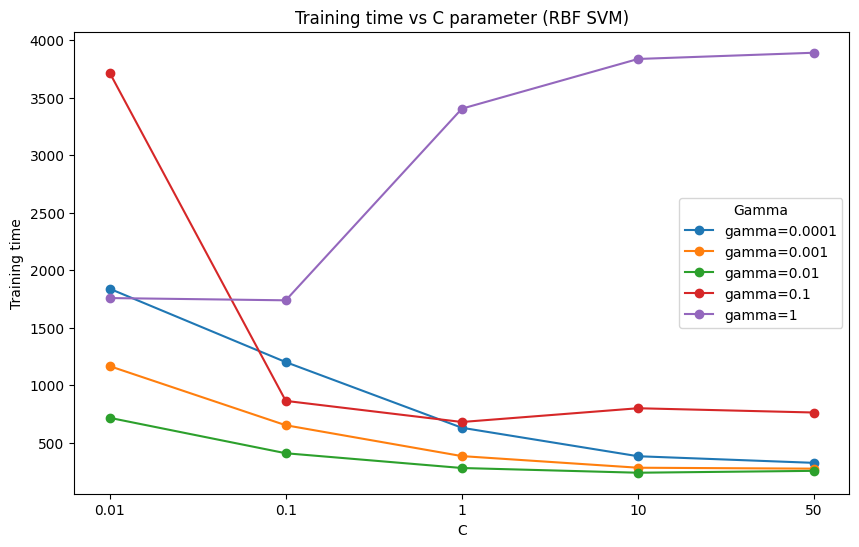

In [13]:
C_values = [0.01, 0.1, 1, 10, 50]
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1]

training_times_rbf = [1839.64, 1167.31, 718.38, 3716.17, 1758.55,
                      1202.18, 653.83, 410.59, 865.41, 1738.91,
                      631.91, 385.75, 282.40, 682.02, 3403.44,
                      384.63, 284.90, 241.44, 801.49, 3835.17,
                      327.07, 276.74, 257.78, 764.37, 3889.42]

index_rbf = range(len(C_values))

plt.figure(figsize=(10, 6))

for i, gamma in enumerate(gamma_values):
    plt.plot(index_rbf, training_times_rbf[i::len(gamma_values)], 'o-', label='gamma=' + str(gamma))

plt.legend(title='Gamma')
plt.title('Training time vs C parameter (RBF SVM)')
plt.xlabel('C')
plt.ylabel('Training time')
plt.xticks(index_rbf, [C for C in C_values])

plt.show()

##### Try different values of C with selected gamma = 0.01

C=20, gamma=0.01, Train Accuracy: 0.96838, Validation accuracy: 0.901
RBF SVM Training Time: 260.22604632377625 seconds
__________________________________________________________________________
C=40, gamma=0.01, Train Accuracy: 0.98302, Validation accuracy: 0.9013
RBF SVM Training Time: 263.3193414211273 seconds
__________________________________________________________________________
C=60, gamma=0.01, Train Accuracy: 0.9893, Validation accuracy: 0.9
RBF SVM Training Time: 268.09926414489746 seconds
__________________________________________________________________________
C=80, gamma=0.01, Train Accuracy: 0.99262, Validation accuracy: 0.8999
RBF SVM Training Time: 255.7418167591095 seconds
__________________________________________________________________________
C=100, gamma=0.01, Train Accuracy: 0.9946, Validation accuracy: 0.8984
RBF SVM Training Time: 260.65781021118164 seconds
__________________________________________________________________________


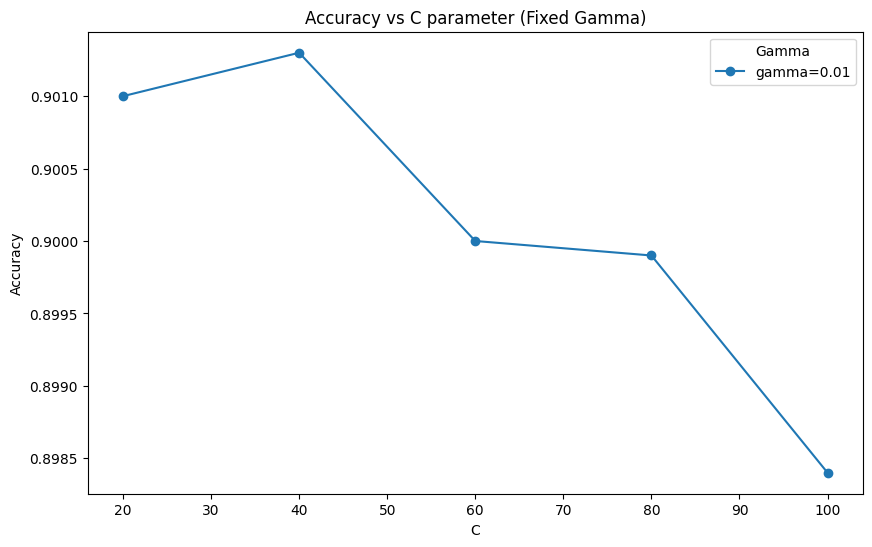

In [30]:
# Try different values of C and gamma
C_values = [20, 40, 60, 80, 100] 
gamma = 0.01
accuracy_values_rbf = []

for C in C_values:
    accuracy_for_C = []
    
    # Train the SVM
    start_time = time.time()
    svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
    svm_rbf.fit(train_X_df, train_y)

    # Predictions on the train set and validation set
    train_y_pred = svm_rbf.predict(train_X_df)
    val_y_pred = svm_rbf.predict(val_X_df)

    # Evaluate accuracy on the validation set
    train_accuracy = accuracy_score(train_y, train_y_pred)
    val_accuracy = accuracy_score(val_y, val_y_pred)

    accuracy_for_C.append(val_accuracy)

    # Check if this combination is better
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_C = C
        best_gamma = gamma
        best_kernel = 'rbf'

    print(f"C={C}, gamma={gamma}, Train Accuracy: {train_accuracy}, Validation accuracy: {val_accuracy}")
    
    end_time = time.time()
    print(f"RBF SVM Training Time: {end_time - start_time} seconds")
    print('__________________________________________________________________________')
    
    accuracy_values_rbf.append(accuracy_for_C)

accuracy_values_rbf = np.array(accuracy_values_rbf)
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs C parameter (Fixed Gamma)")
plt.xlabel("C")
plt.ylabel("Accuracy")

# Plot accuracy values for the fixed gamma
plt.plot(C_values, accuracy_values_rbf[:, 0], 'o-', label=f'gamma={gamma}')

plt.legend(title='Gamma')
plt.show()


##### Plot training time 

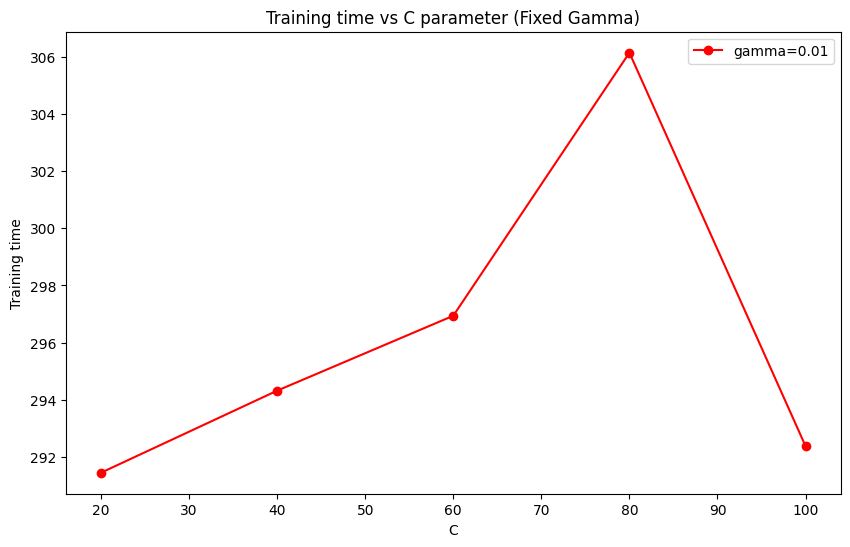

In [19]:
C_values = [20, 40, 60, 80, 100]
gamma = 0.01

training_times_rbf = [291.45, 294.32, 296.94, 306.14, 292.38]

plt.figure(figsize=(10, 6))

plt.plot(C_values, training_times_rbf, marker='o', linestyle='-', color='red', label=f'gamma={gamma}')

plt.xlabel('C')
plt.ylabel('Training time')

plt.title('Training time vs C parameter (Fixed Gamma)')
plt.legend()

plt.show()

### 9. Train the SVM with the best hyperparameter combination

In [9]:
# Print the best parameters and best validation accuracy achieved during hyperparameter tuning
print(f"Best parameters: kernel={best_kernel}, C={best_C}, gamma={best_gamma}, Best Validation Accuracy: {best_accuracy}")

# Initialize the final SVM model with the best parameters obtained
svm_final = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma)
# svm_final = SVC(kernel='rbf', C=40, gamma=0.01)
# Standardize and apply PCA to the training data
X_train_std = scaler.transform(X_train)
X_train_pca = pca.transform(X_train_std) 
X_train_df = pd.DataFrame(X_train_pca)

# Standardize and apply PCA to the test data
X_test_std = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_std) 
X_test_df = pd.DataFrame(X_test_pca)

# Fit the final SVM model to the transformed training data
svm_final.fit(X_train_df, y_train)

# Predict labels for the training and test sets
y_train_pred = svm_final.predict(X_train_df)
y_test_pred = svm_final.predict(X_test_df)

### 10. Evaluate the results 

##### The accuracy scores achieved on the training and test sets

In [10]:
svc_train = metrics.accuracy_score(y_train,y_train_pred)
svc_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Train Accuracy score: {}".format(svc_train))

print("Test Accuracy score: {}".format(svc_accuracy))

Train Accuracy score: 0.9813333333333333
Test Accuracy score: 0.9032


##### The classification report for the train data

In [11]:
# Print the classification report for the training data
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6000
           1       1.00      1.00      1.00      6000
           2       0.97      0.97      0.97      6000
           3       0.98      0.99      0.98      6000
           4       0.96      0.97      0.96      6000
           5       1.00      1.00      1.00      6000
           6       0.96      0.94      0.95      6000
           7       0.99      1.00      0.99      6000
           8       1.00      1.00      1.00      6000
           9       1.00      0.99      0.99      6000

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



##### The classification report for the test data

In [12]:
# Print the classification report for the test data
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.85      0.83      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.77      0.72      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



##### The confusion matrix of the predictions on the test data

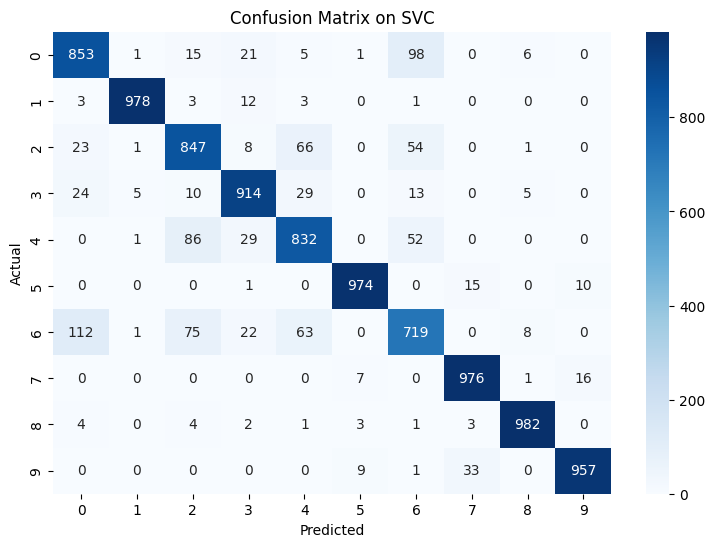

In [13]:
con_matrix = pd.crosstab(pd.Series(y_test.flatten(), name='Actual' ),pd.Series(y_test_pred, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVC")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()